## การจำแนกและการตรวจจับวัตถุในไฟล์รูปภาพด้วยเทคนิคการเรียนรู้เชิงลึก  (Image Classification & Object Detection)
อ่านเพิ่มเติมได้จาก https://imageai.readthedocs.io/en/latest/prediction/index.html




ติดตั้ง Libraries สำหรับการจำแนกภาพถ่าย

In [ ]:
!pip install cython 
!pip install pillow>=7.0.0 
!pip install numpy>=1.18.1 
!pip install opencv-python>=4.1.2 
!pip install torch>=1.9.0 --extra-index-url https://download.pytorch.org/whl/cu102 
!pip install torchvision>=0.10.0 --extra-index-url https://download.pytorch.org/whl/cu102 
!pip install pytest==7.1.3 
!pip install tqdm==4.64.1 
!pip install scipy>=1.7.3 
!pip install matplotlib>=3.4.3 
!pip install mock==4.0.3
!pip install imageai --upgrade

import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 KB 19.7 MB/s eta 0:00:00
  Attempting uninstall: pluggy
    Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1
  Attempting uninstall: pytest
    Found existing installation: pytest 3.6.4
    Uninstalling pytest-3.6.4:
      Successfully uninstalled pytest-3.6.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 KB 8.8 MB/s eta 0:00:00


ทำการเชื่อม Google Drive

In [ ]:
from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


ระบุ Folder ใน Drive ที่ต้องการใช้

In [ ]:
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks")

#Image Classification

In [ ]:
from imageai.Classification import ImageClassification
import os


def image_classification(filename):
    execution_path = os.getcwd()

    prediction = ImageClassification()
    prediction.setModelTypeAsResNet50()
    prediction.setModelPath( "resnet50-19c8e357.pth")
    prediction.loadModel()
    predictions, probabilities = prediction.classifyImage(os.path.join(execution_path, filename), result_count=3)
    for eachPrediction, eachProbability in zip(predictions, probabilities):
          print(eachPrediction , " : " , eachProbability)
    

Pembroke  :  94.1938
Cardigan  :  5.7478
kelpie  :  0.008


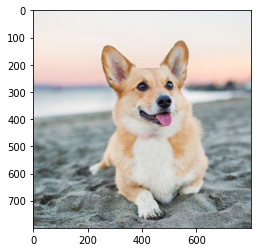

In [ ]:
#@title ระบุชื่อไฟล์เพื่อจำแนกวัตถุ
filename = "prediction2.jpg" #@param ["prediction1.jpg", "prediction2.jpg", "prediction3.jpg"]

image_classification(filename)

img = mpimg.imread(filename)
plt.imshow(img)
plt.show()


#Object Detection

In [ ]:
from imageai.Detection import ObjectDetection
import os


def image_detection(filename):
        detector = ObjectDetection()
        detector.setModelTypeAsYOLOv3()
        detector.setModelPath( "yolov3.pt")
        detector.loadModel()
        detections = detector.detectObjectsFromImage(input_image= filename, output_image_path= "imagenew.jpg", minimum_percentage_probability=30)

        for eachObject in detections:
              print(eachObject["name"] , " : ", eachObject["percentage_probability"], " : ", eachObject["box_points"] )
              print("--------------------------------")

cat  :  99.92  :  [34, 56, 108, 197]
--------------------------------
dog  :  99.11  :  [106, 13, 205, 197]
--------------------------------


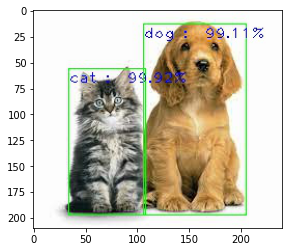

In [ ]:
#@title ระบุชื่อไฟล์เพื่อจำแนกวัตถุ
filename = "prediction3.jpg" #@param ["prediction1.jpg", "prediction2.jpg", "prediction3.jpg"]

image_detection(filename)

img = mpimg.imread('imagenew.jpg')
plt.imshow(img)
plt.show()